/var/folders/gg/y13kmxq903n_0k8qcq3bqf4r0000gp/T/ipykernel_99426/96323263.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


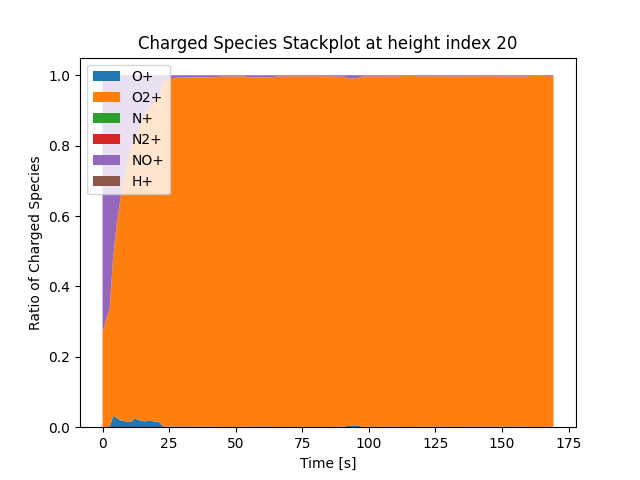

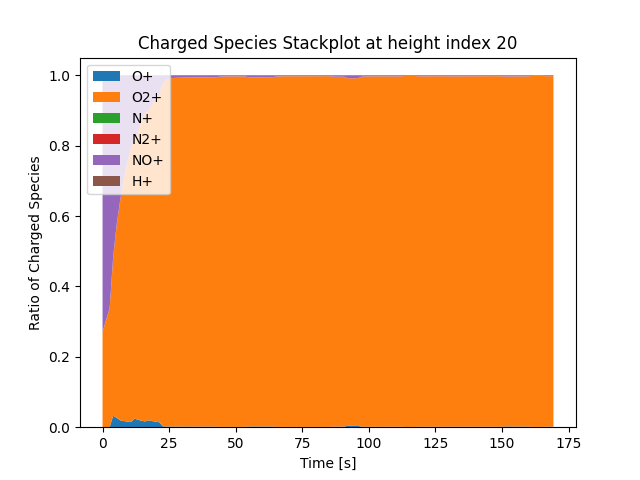

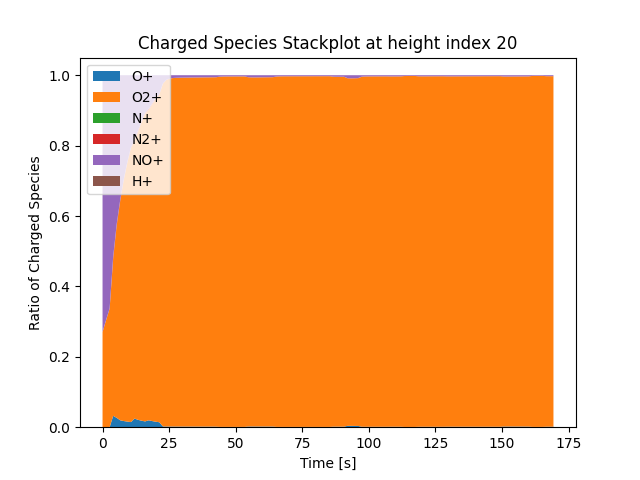

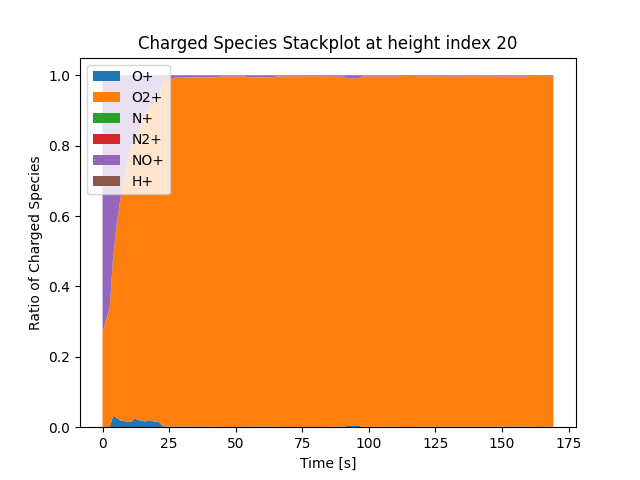

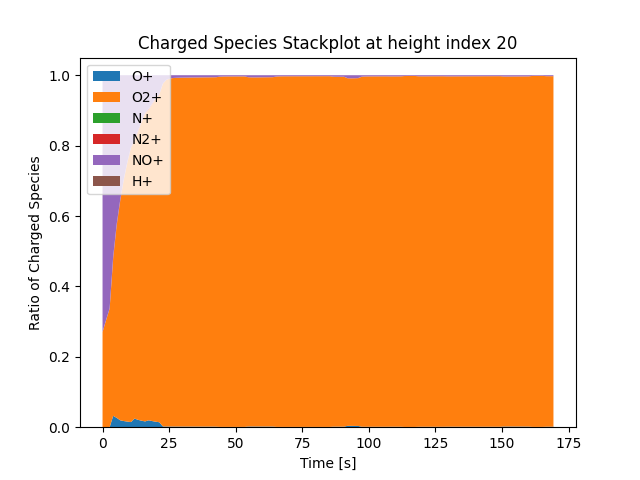

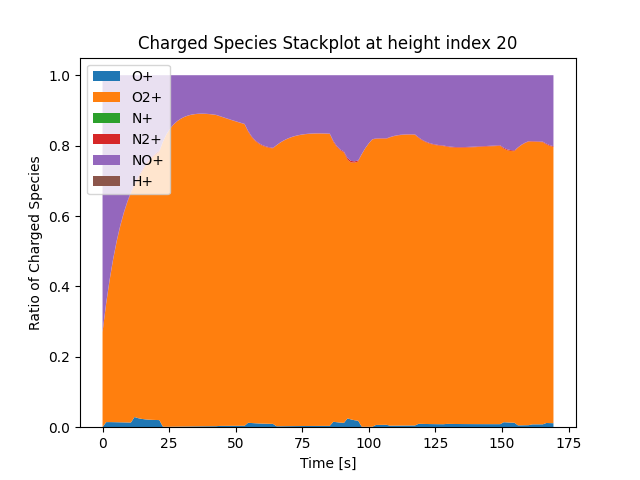

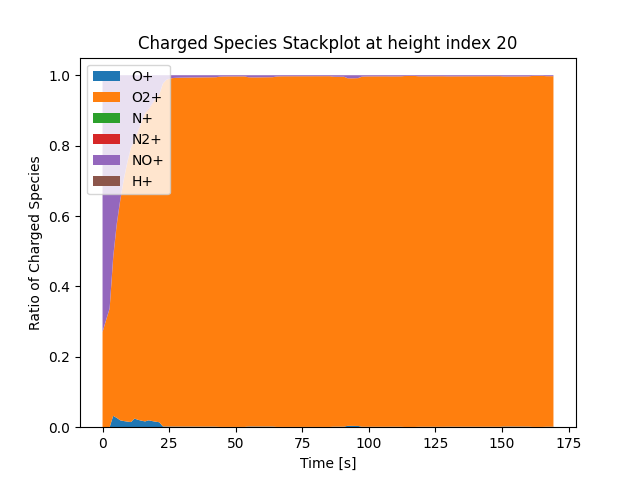

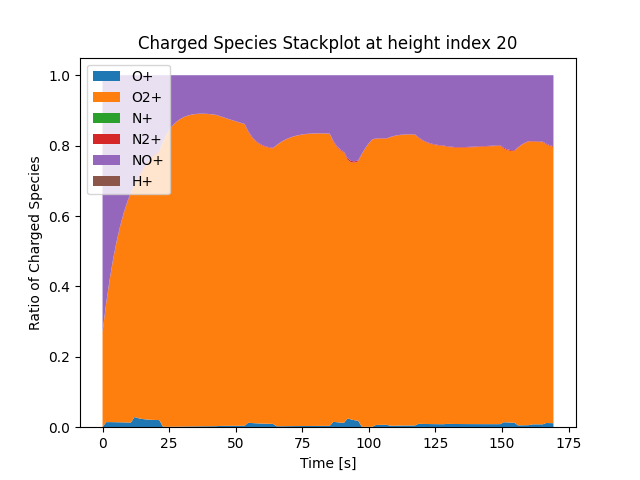

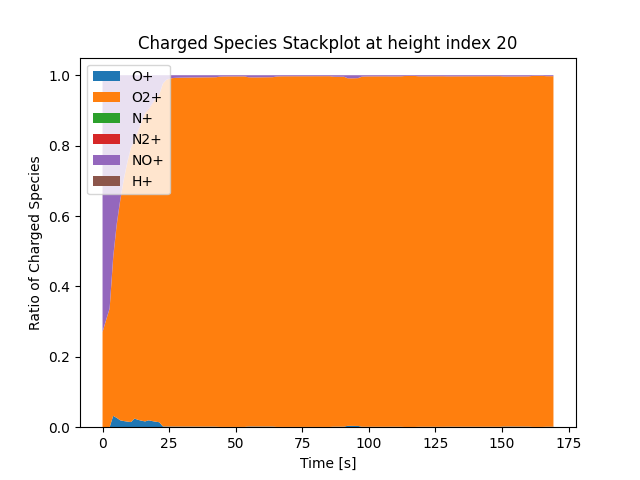

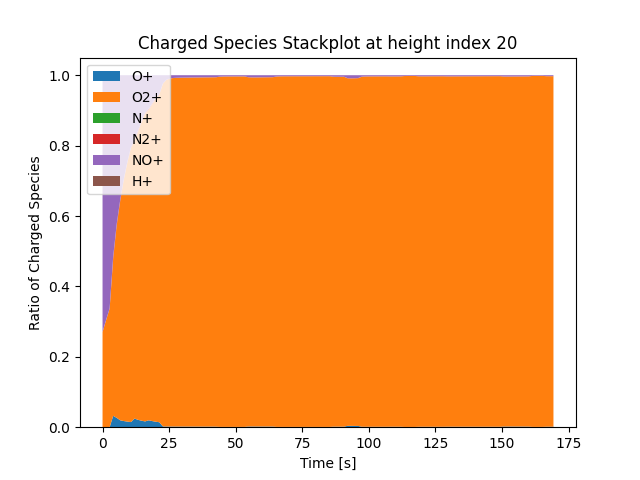

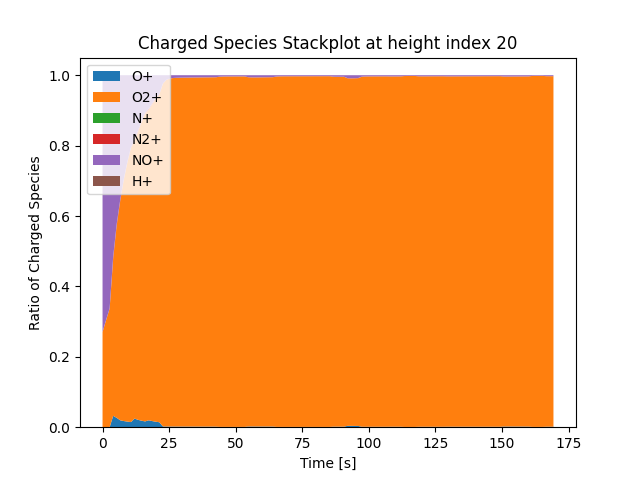

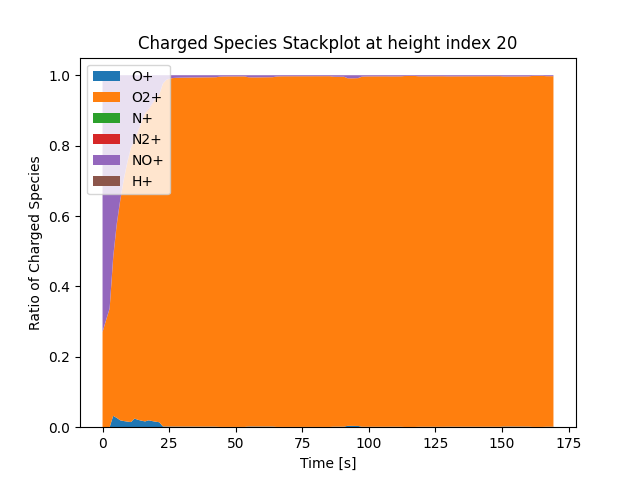

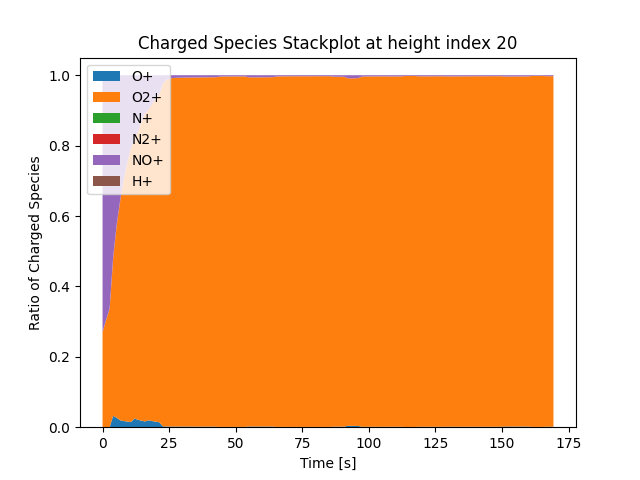

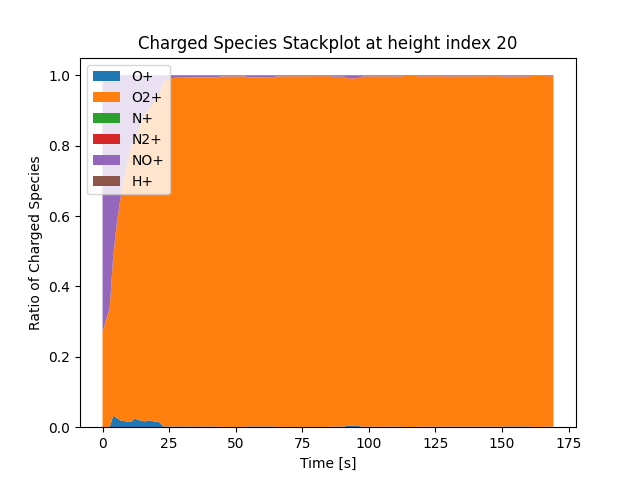

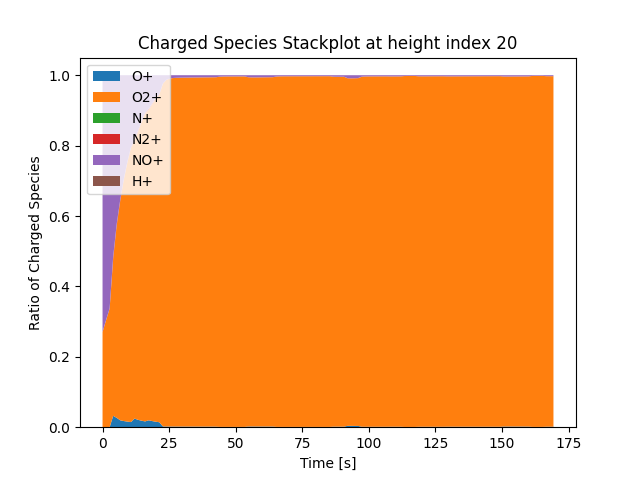

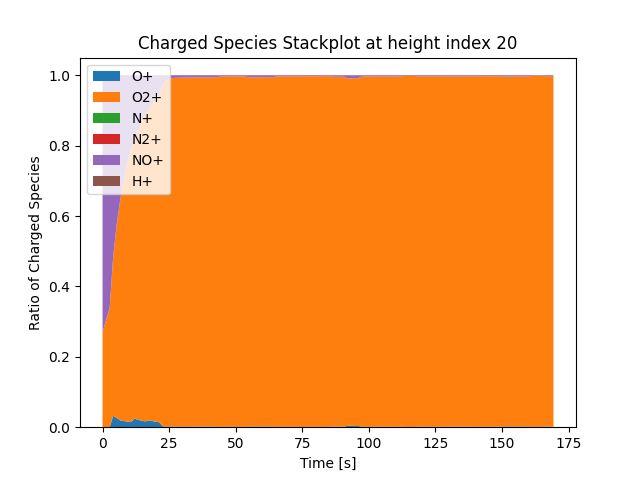

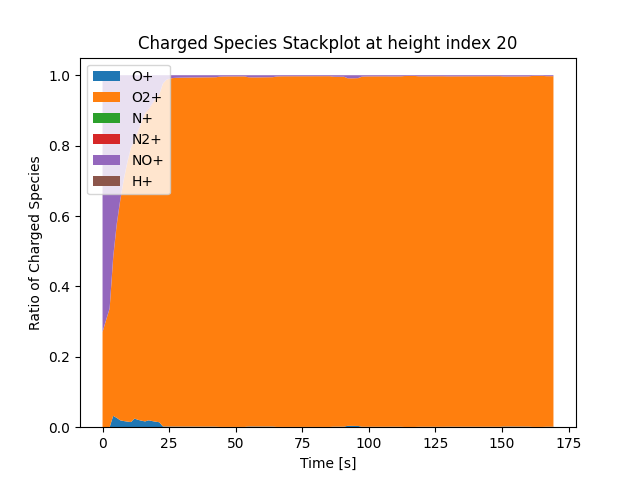

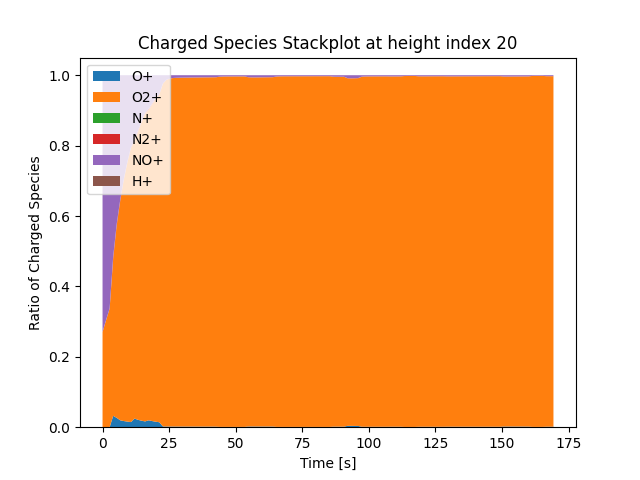

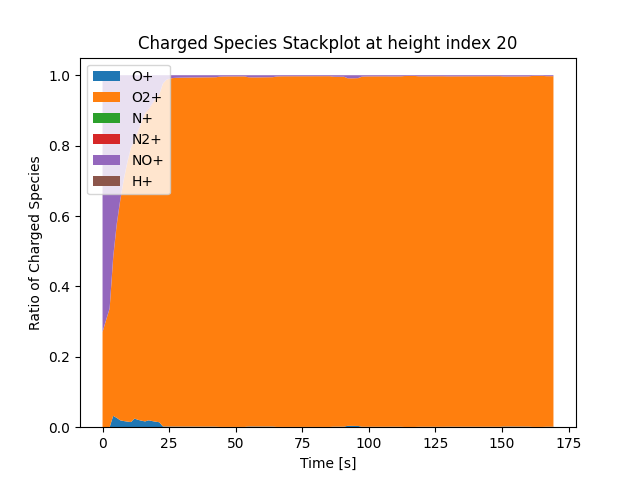

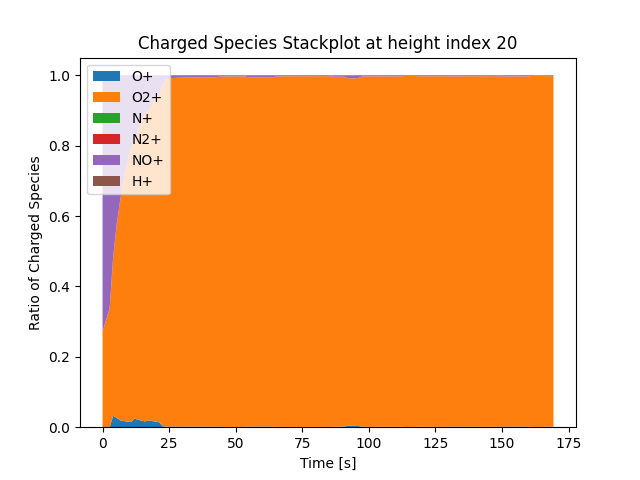

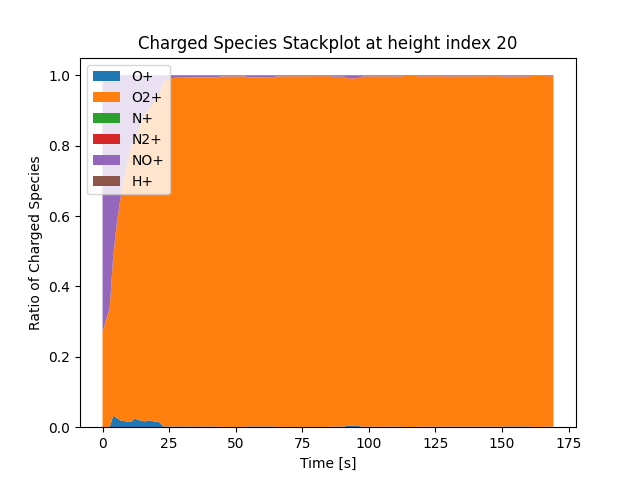

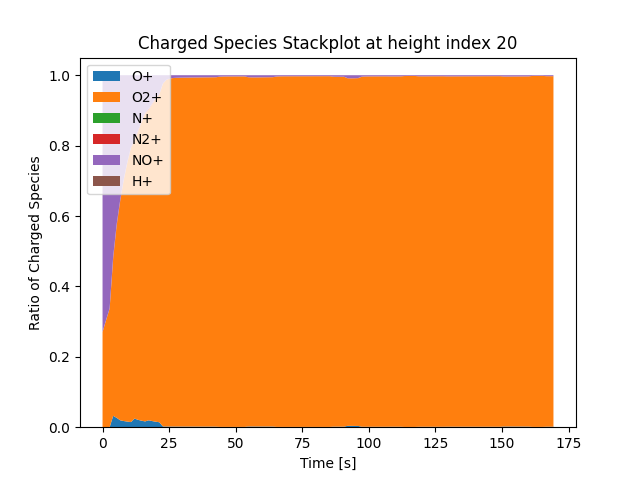

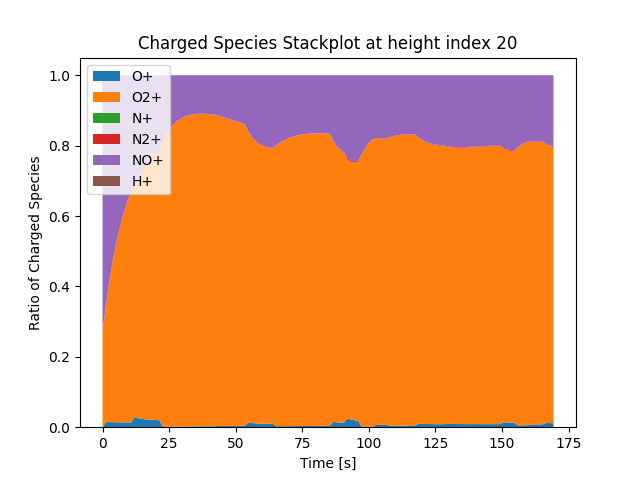

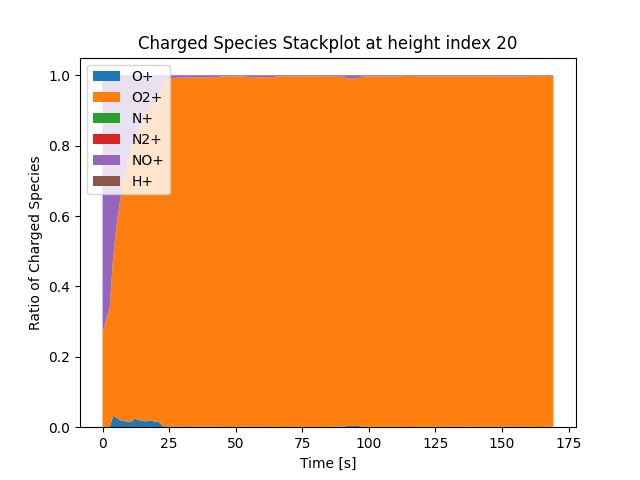

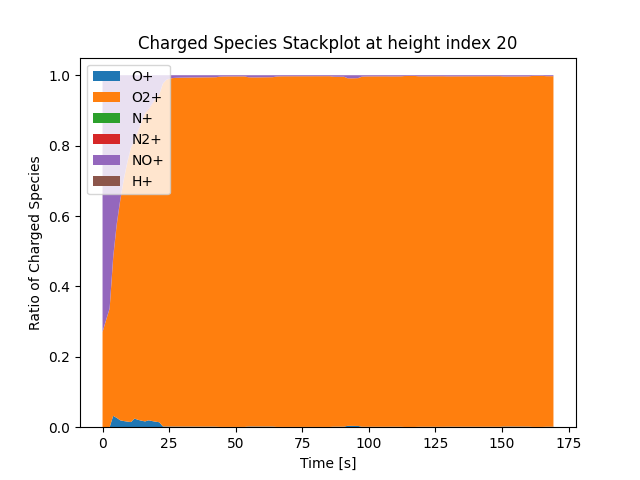

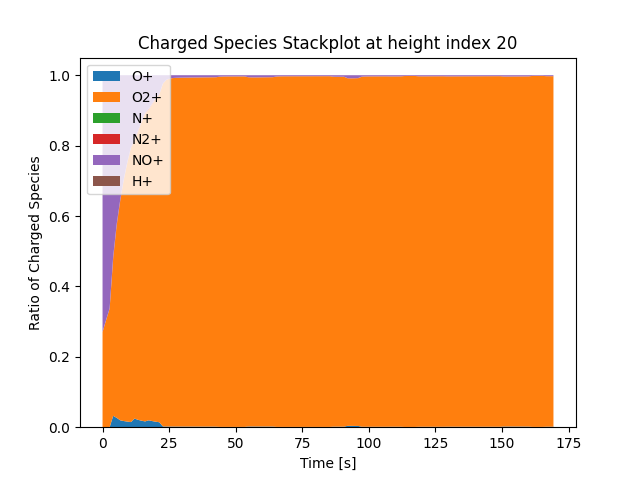

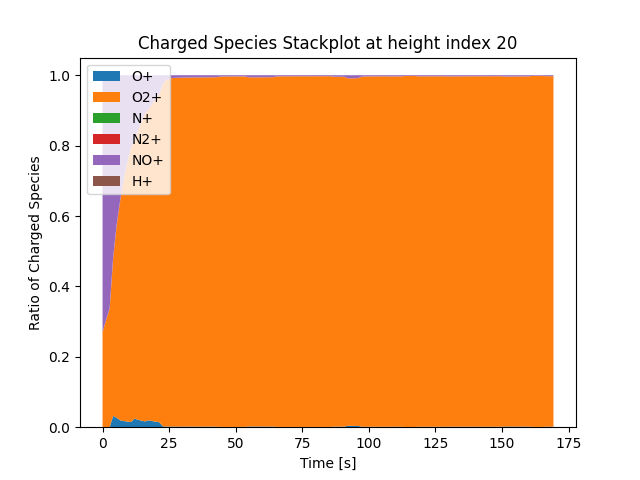

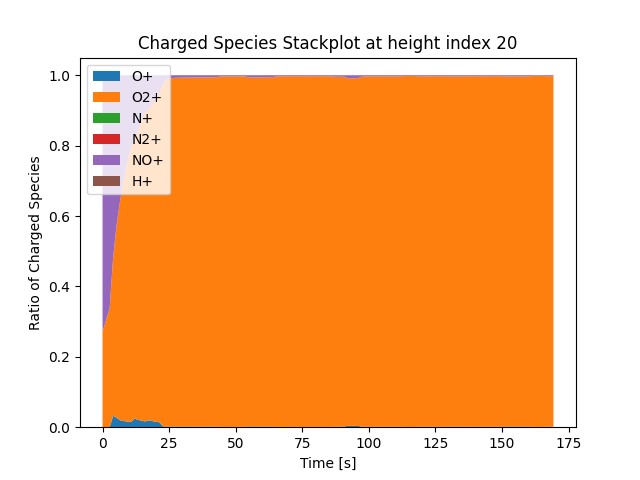

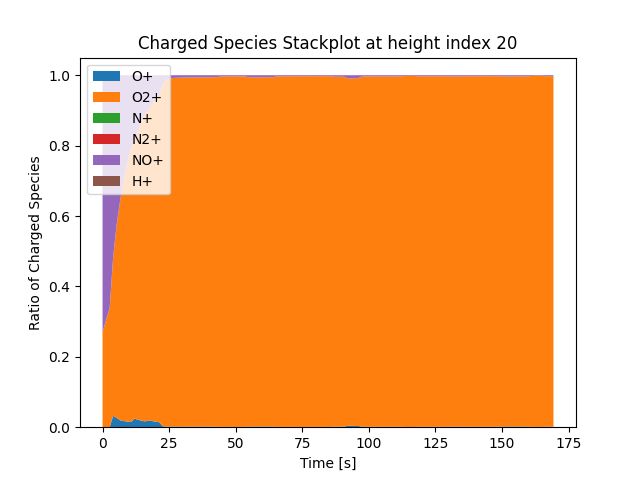

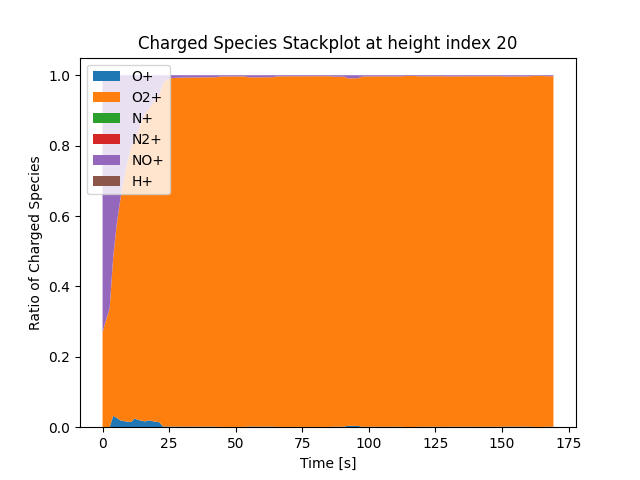

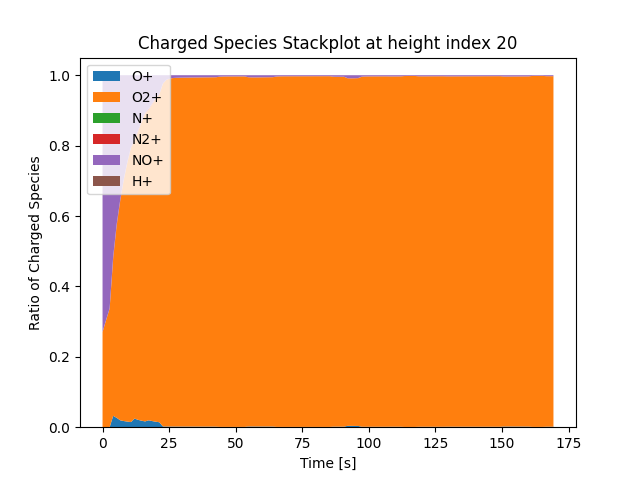

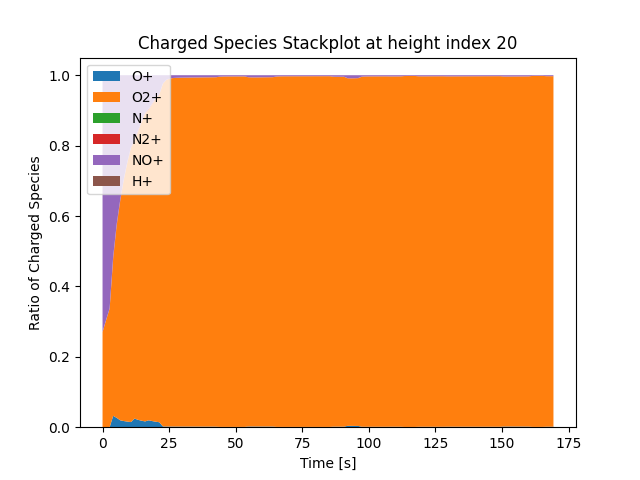

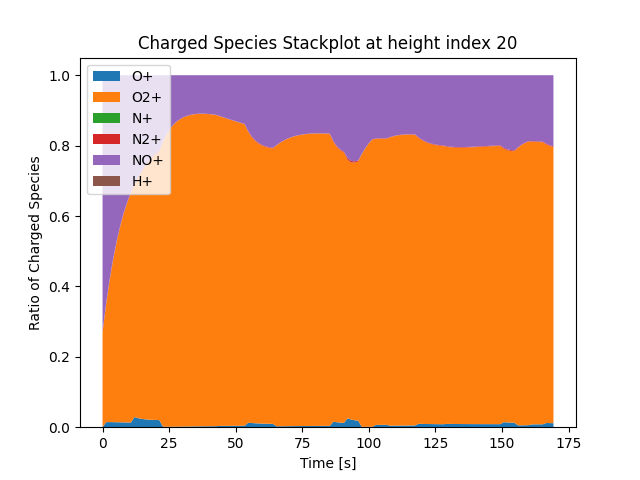

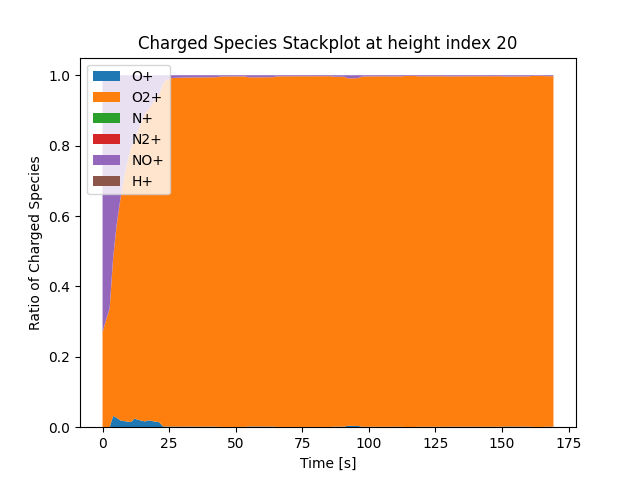

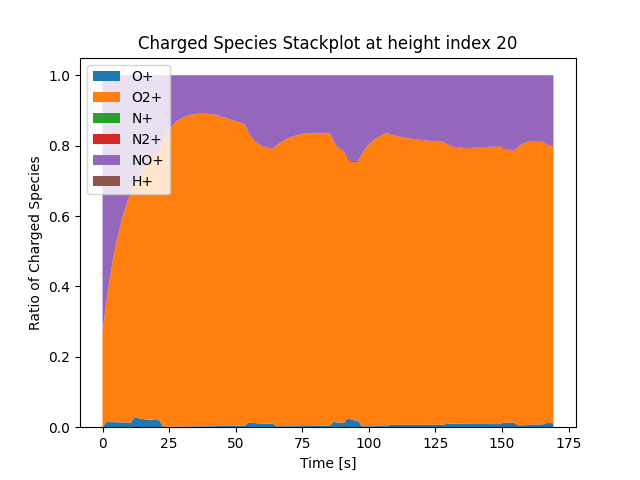

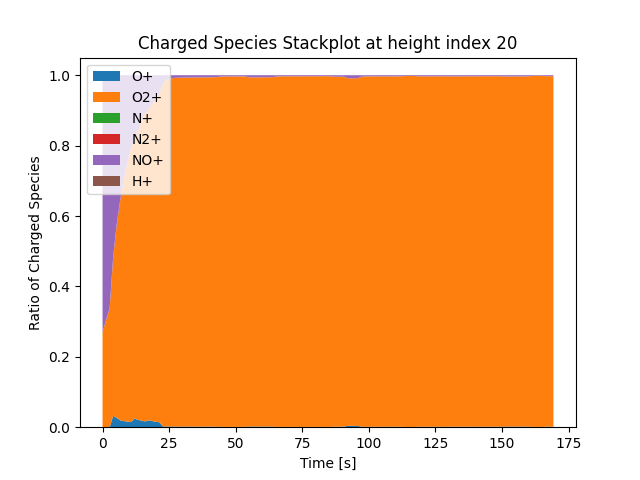

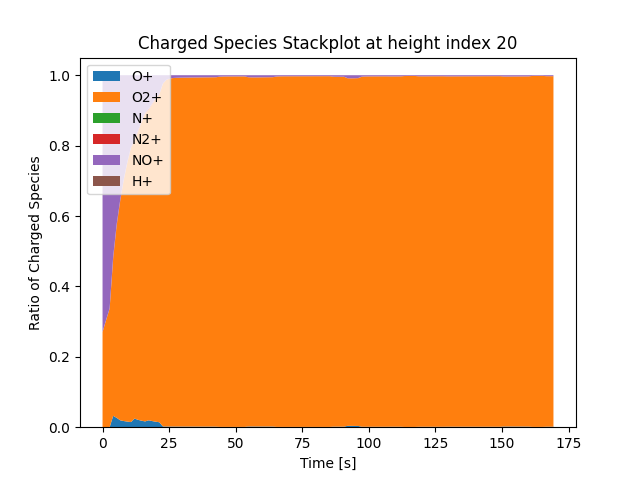

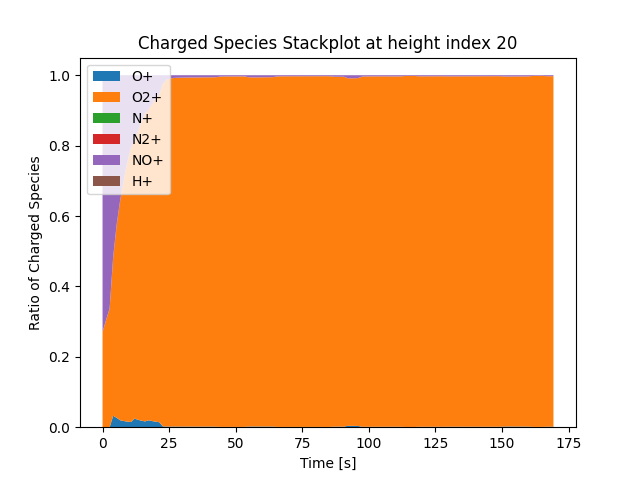

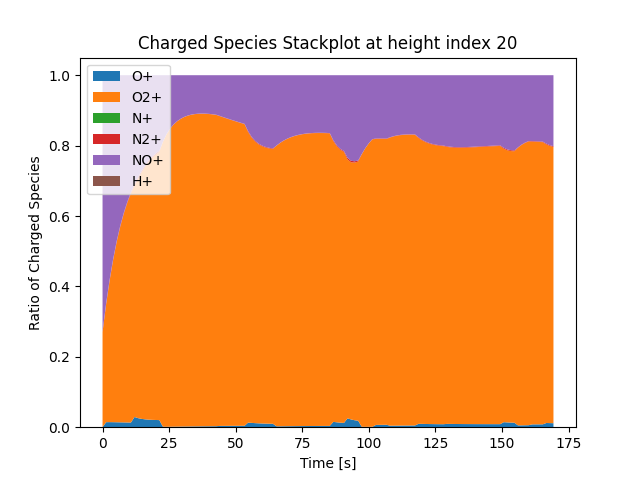

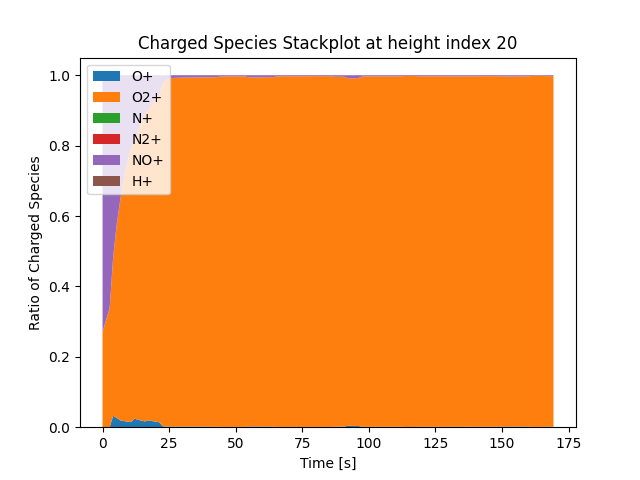

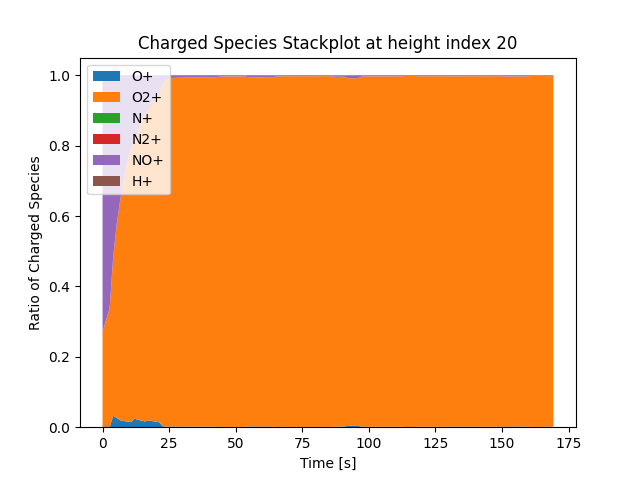

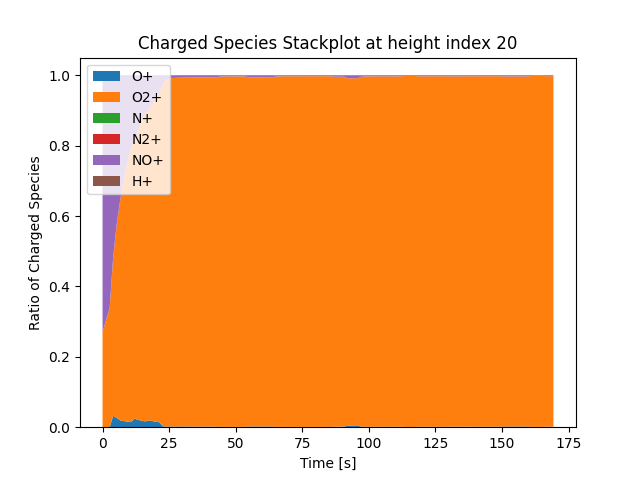

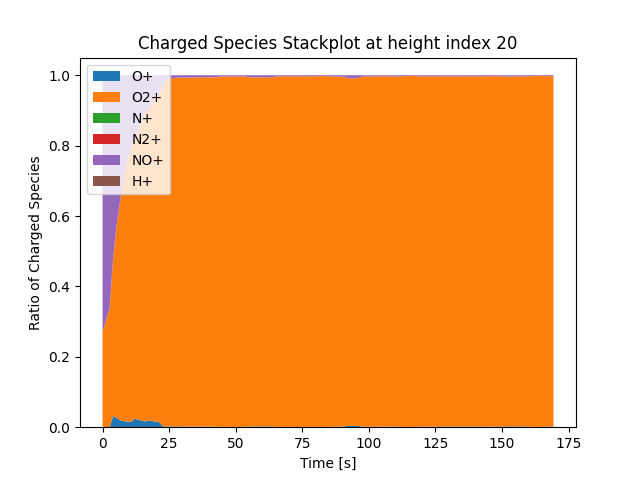

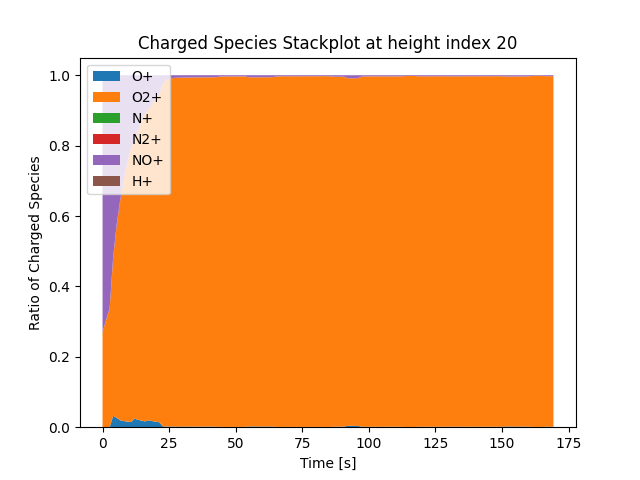

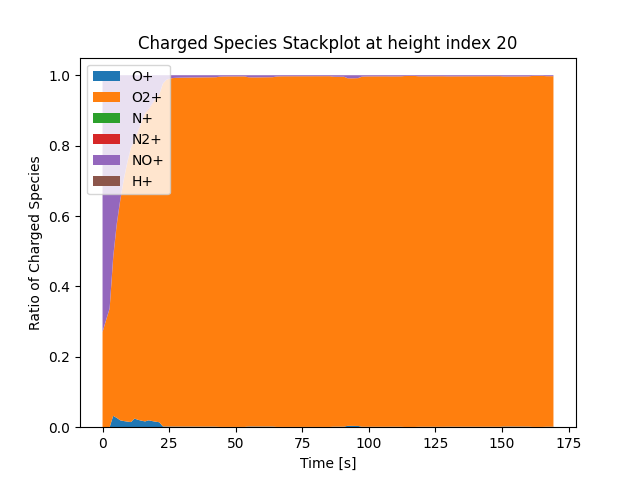

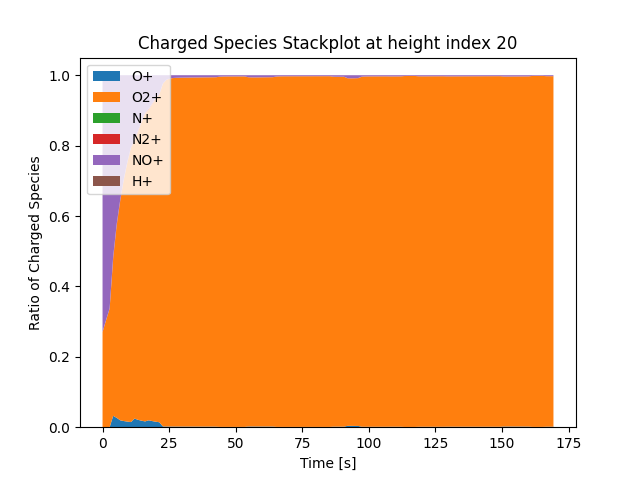

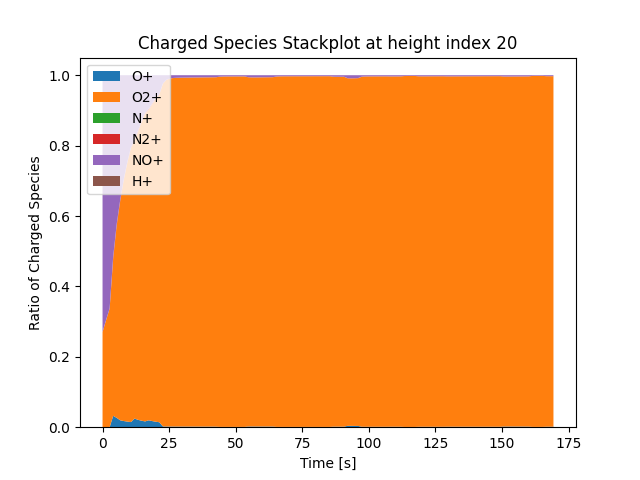

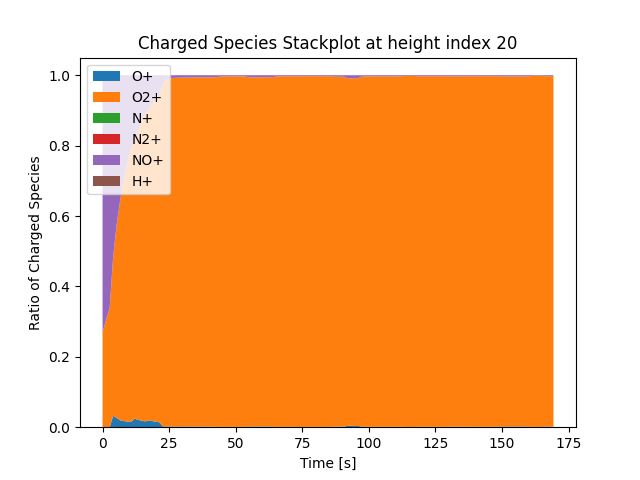

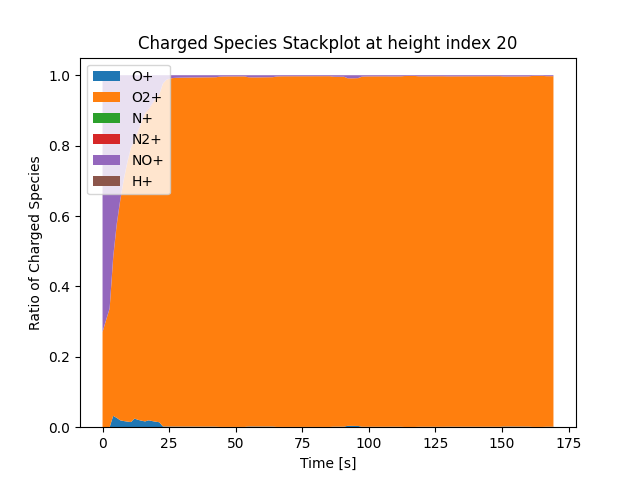

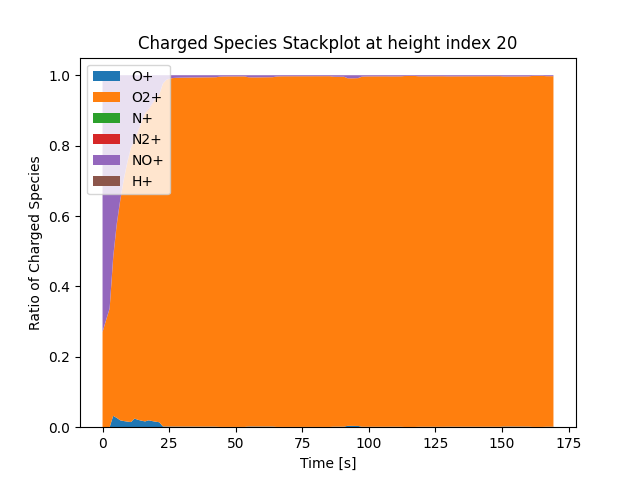

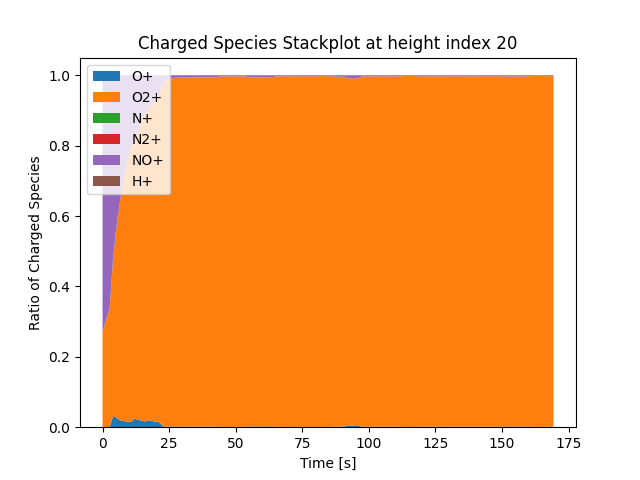

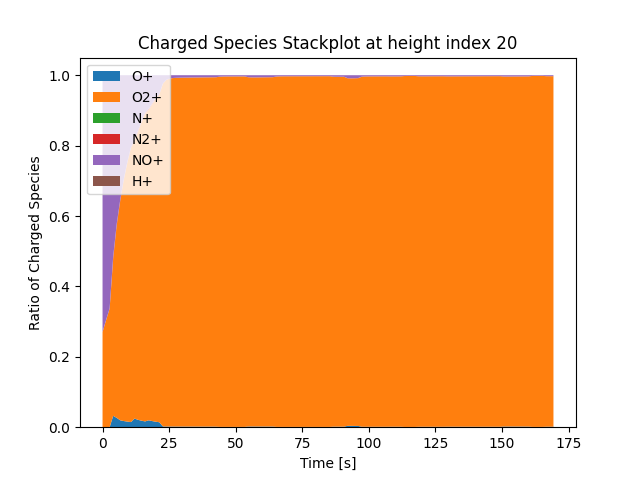

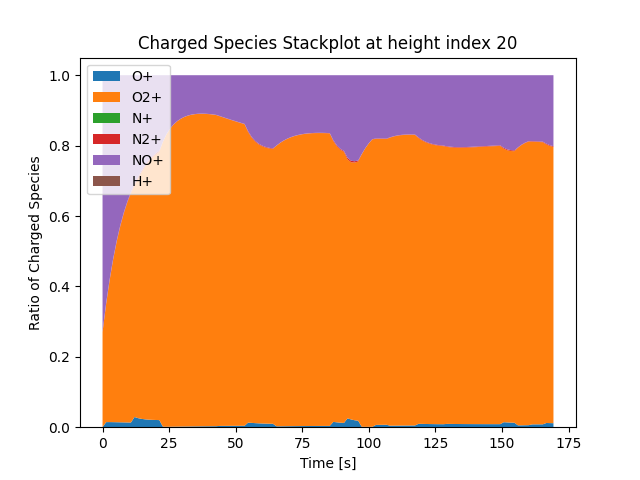

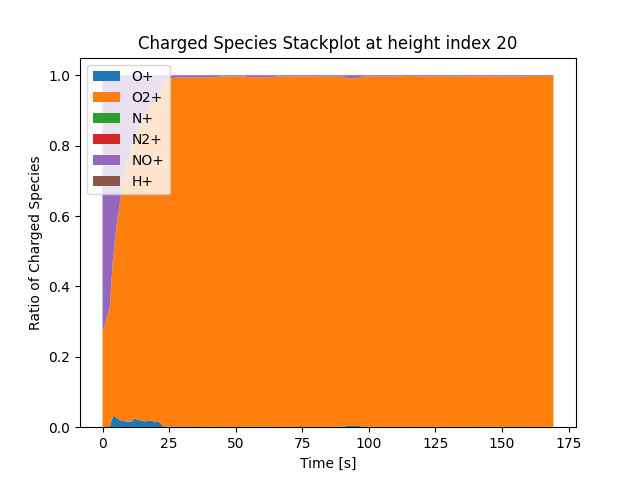

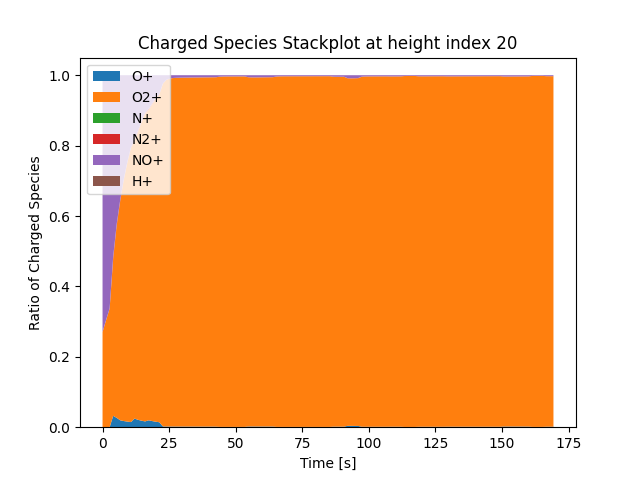

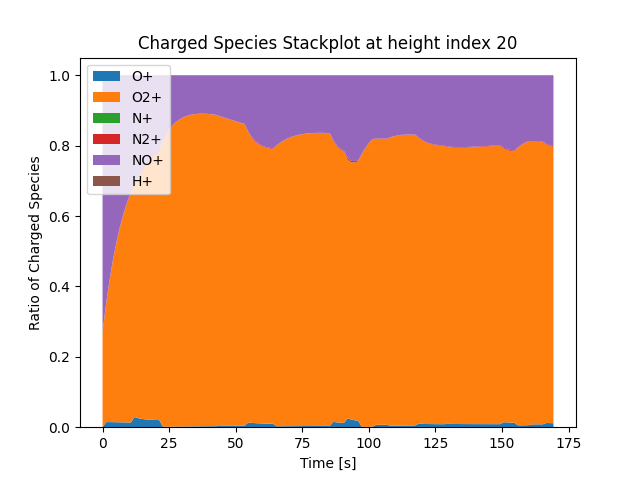

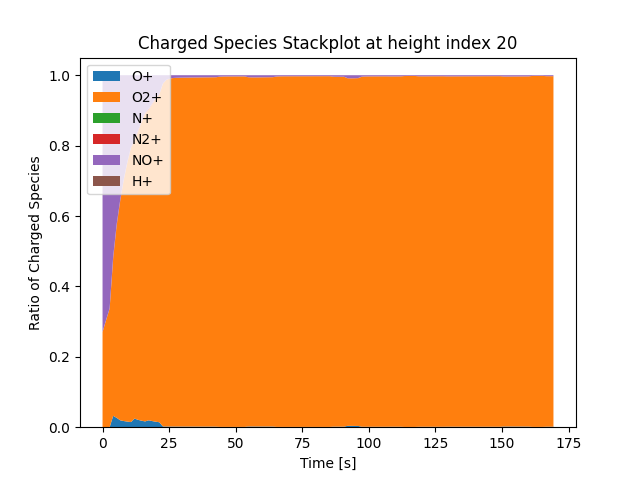

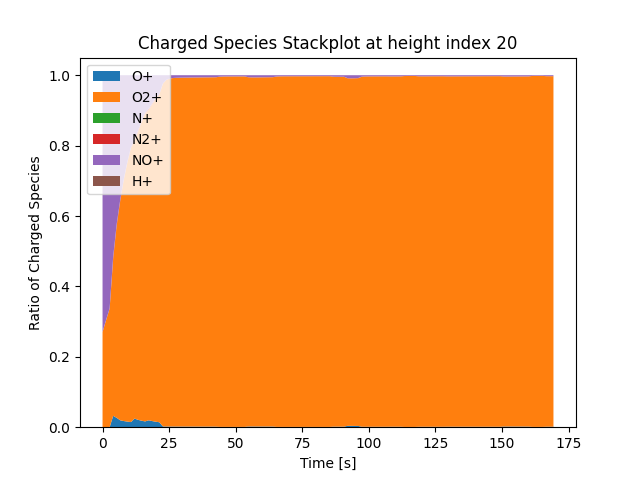

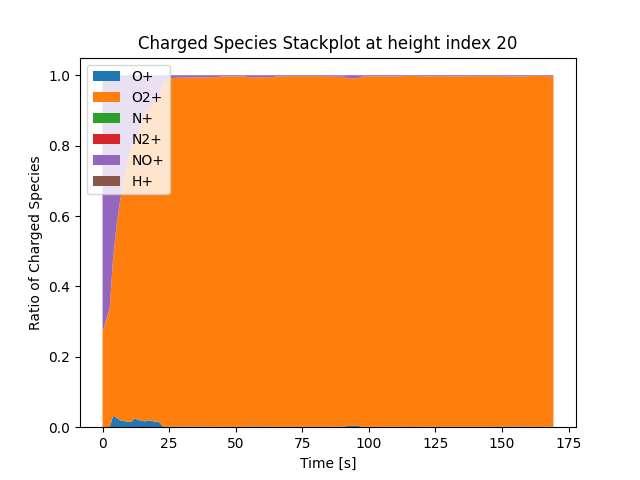

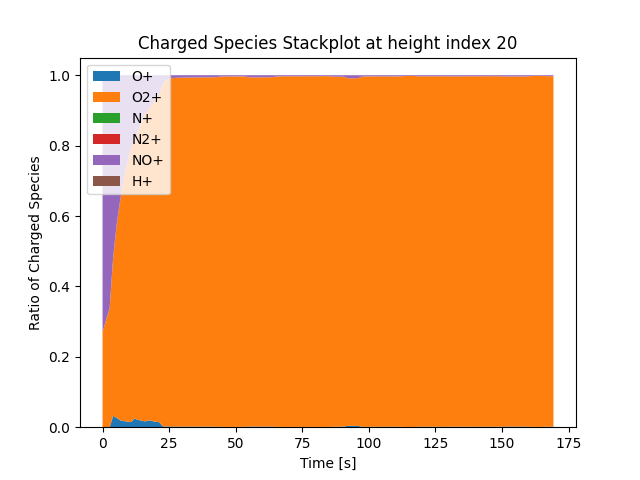

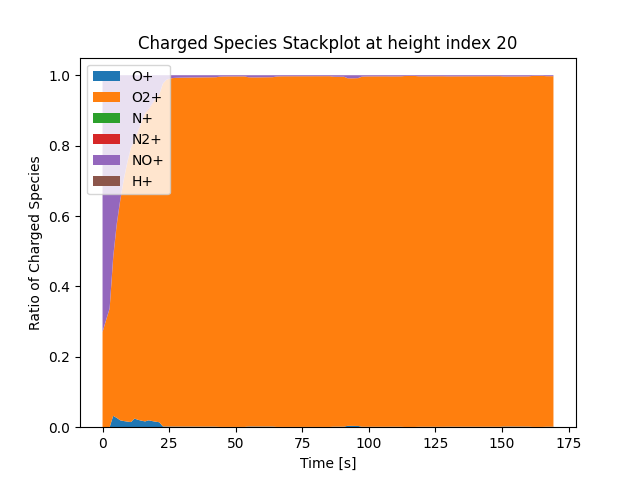

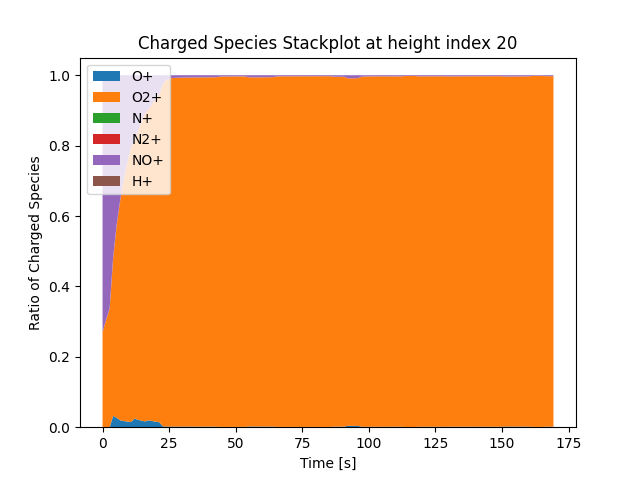

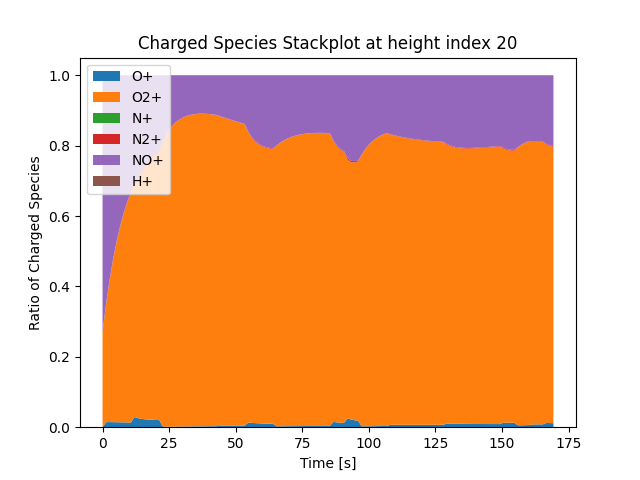

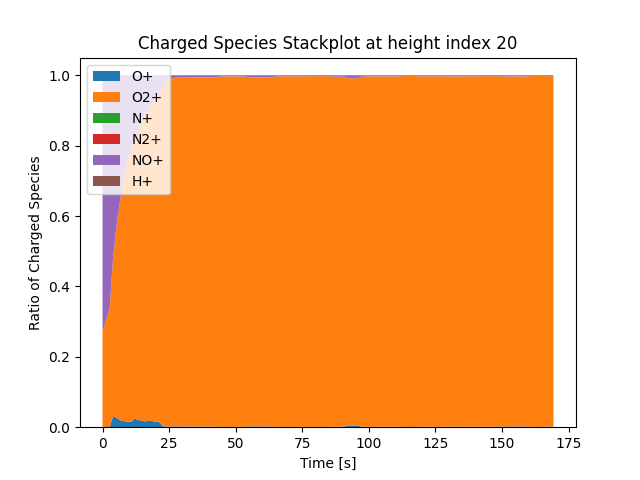

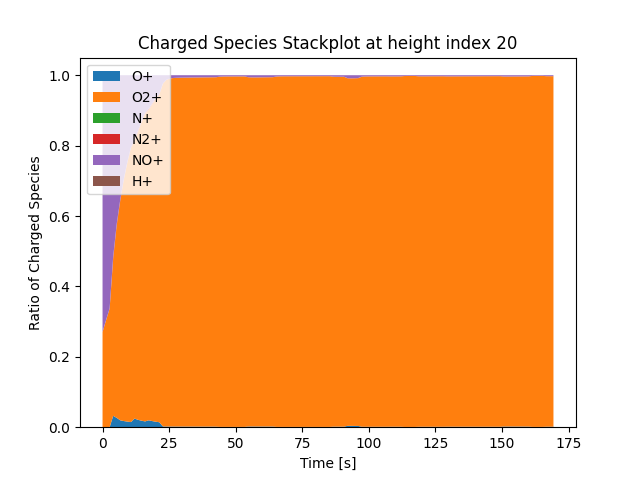

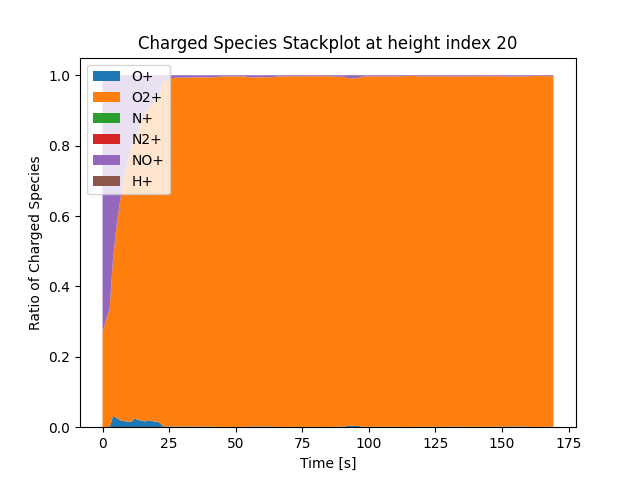

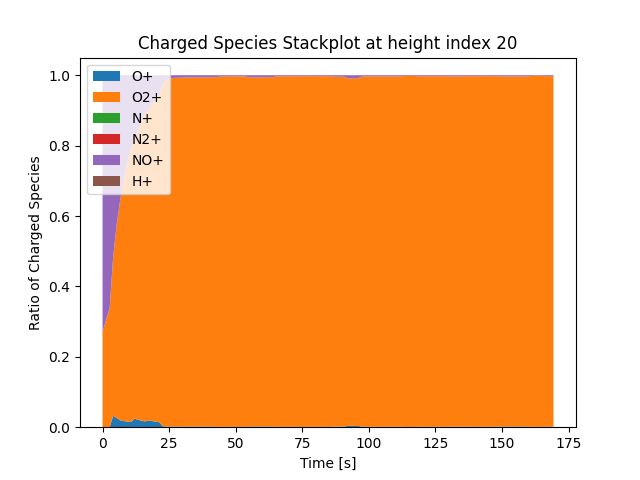

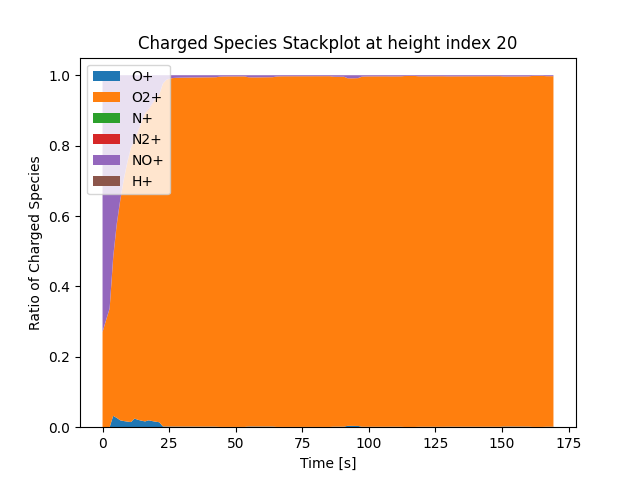

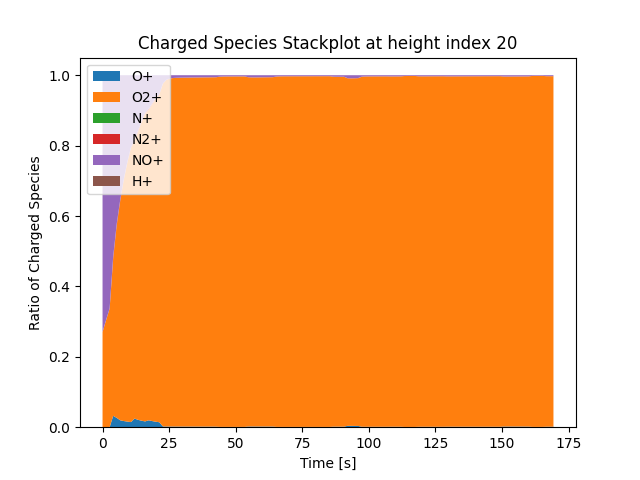

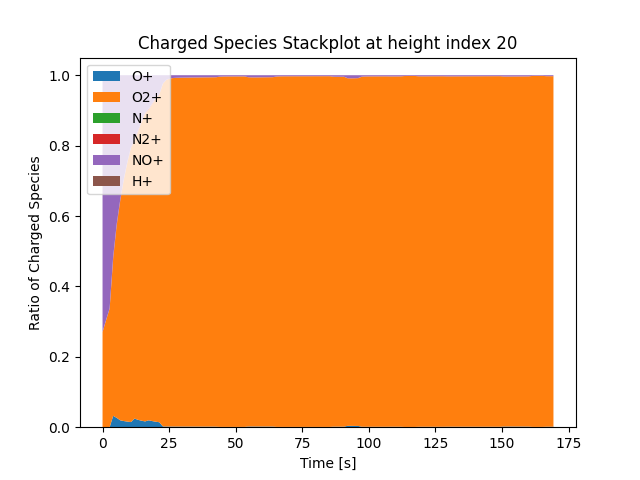

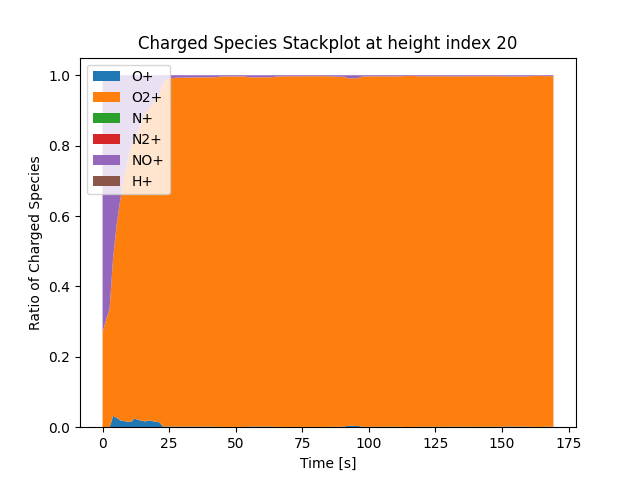

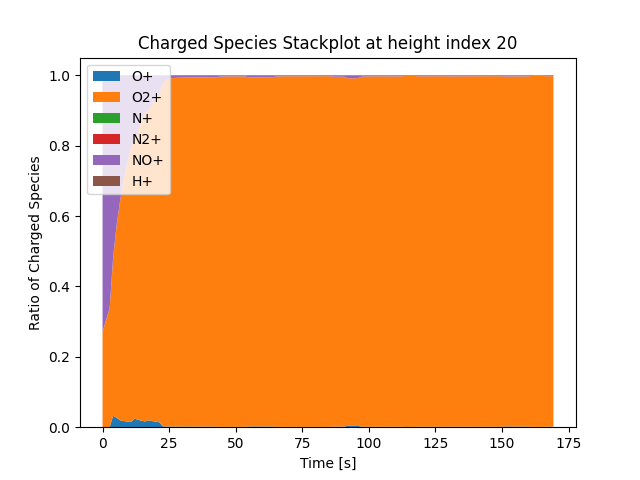

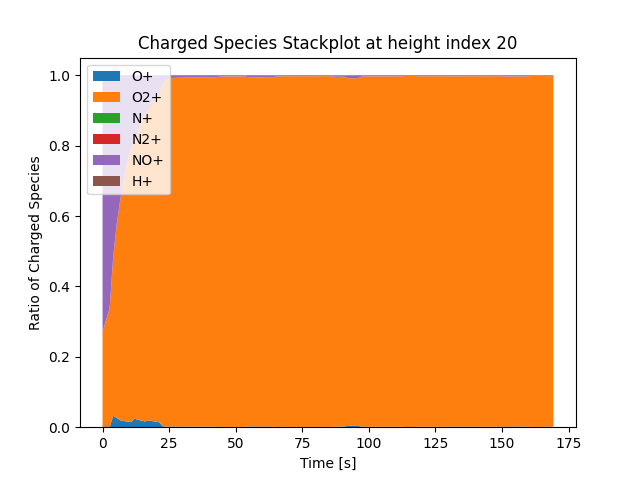

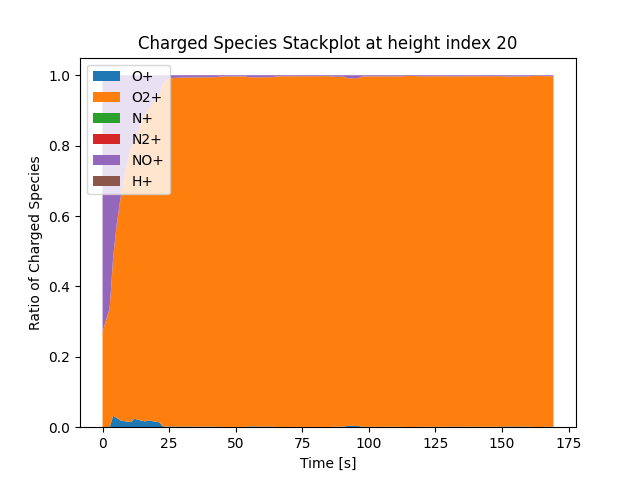

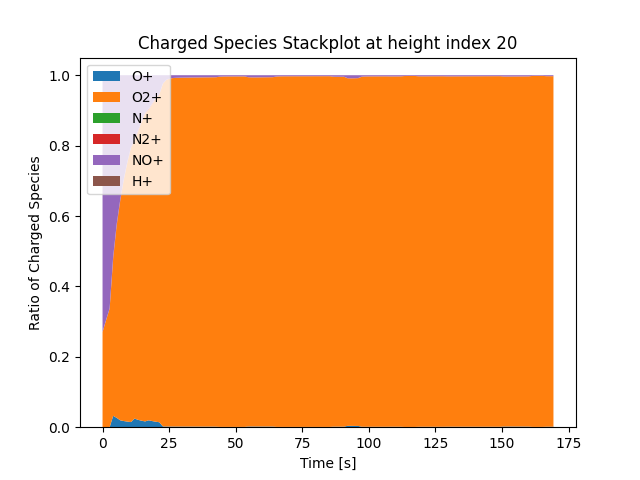

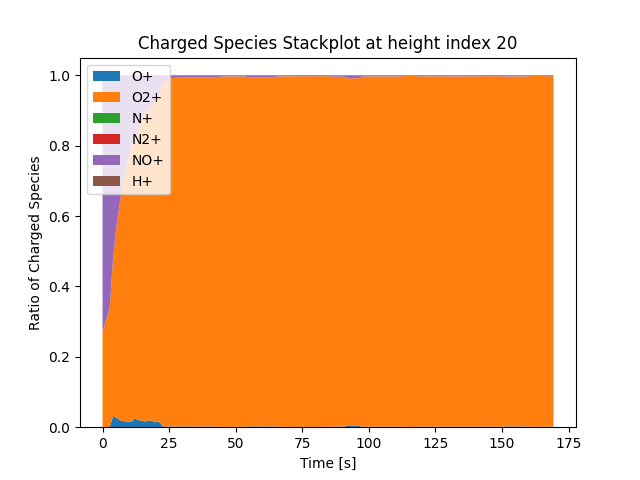

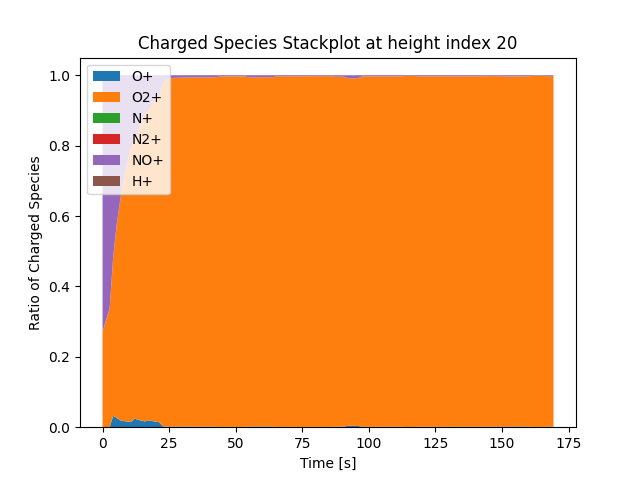

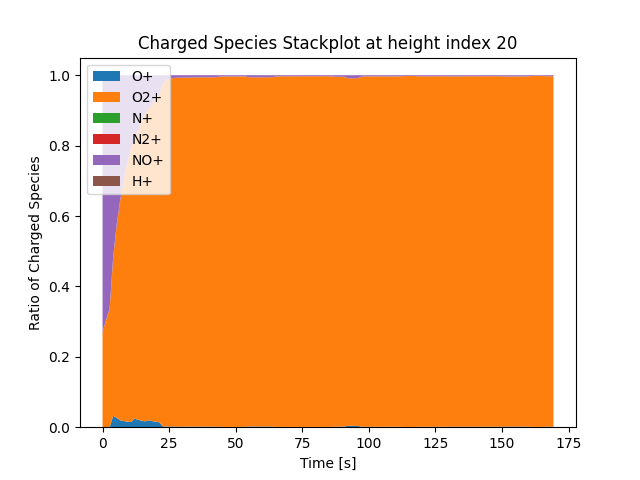

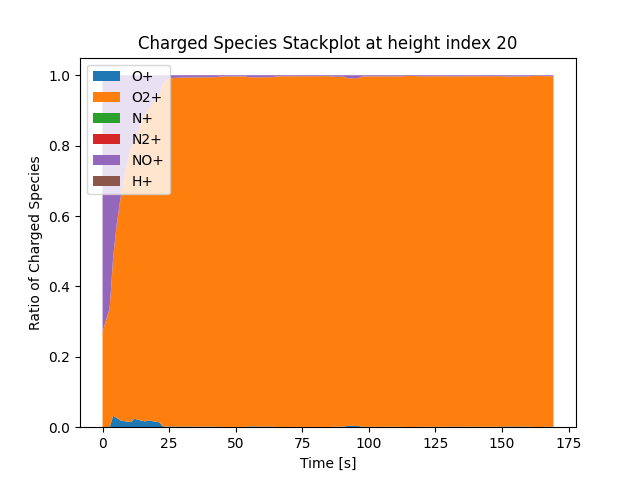

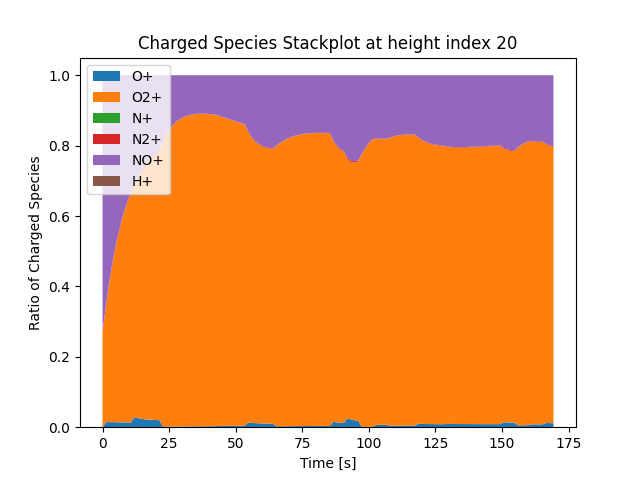

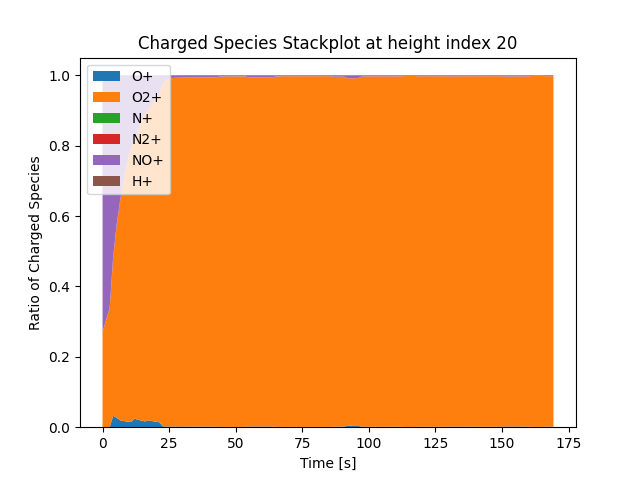

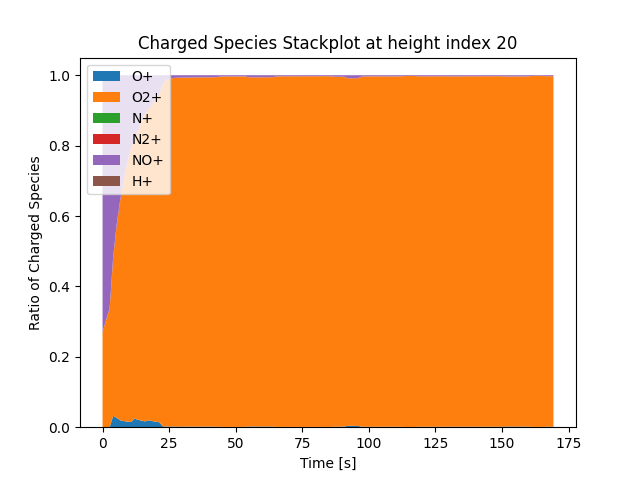

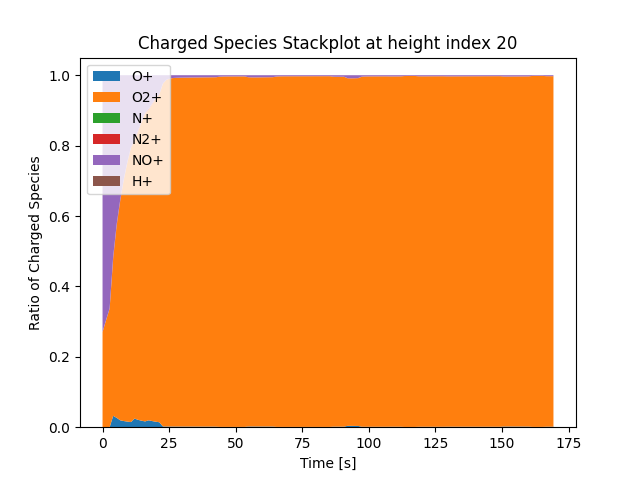

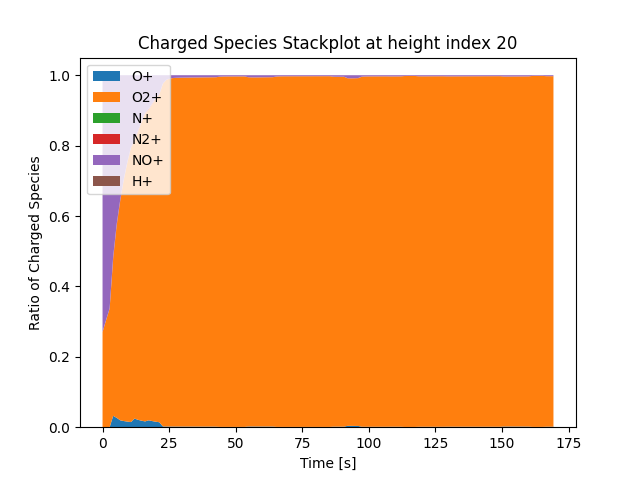

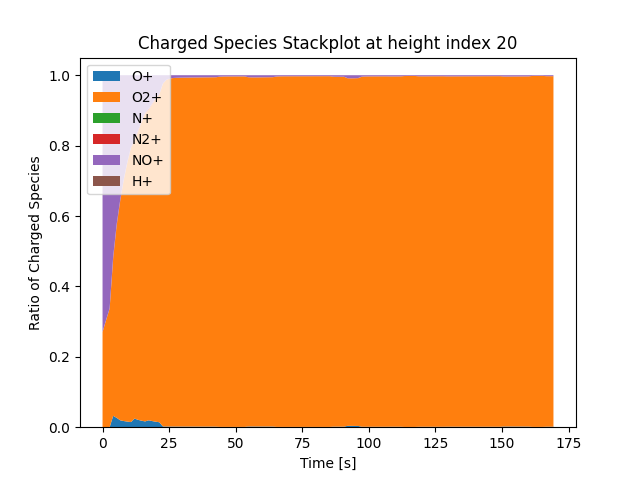

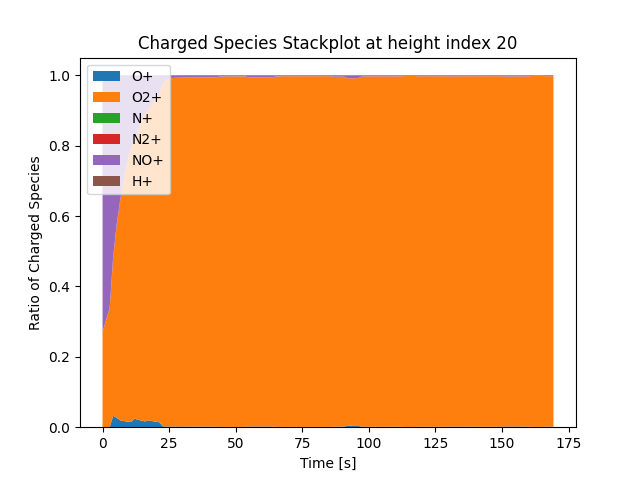

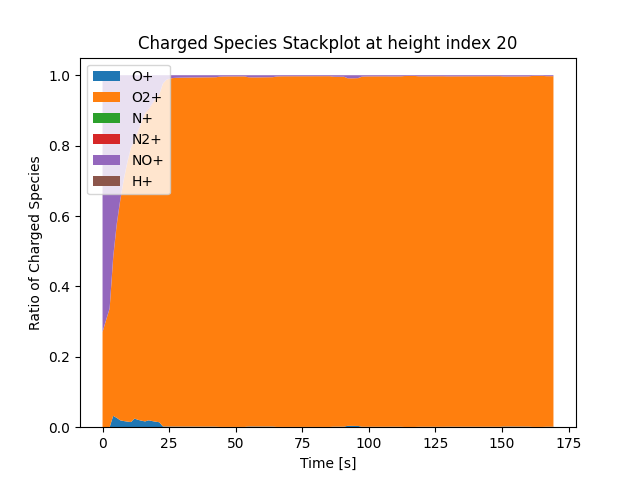

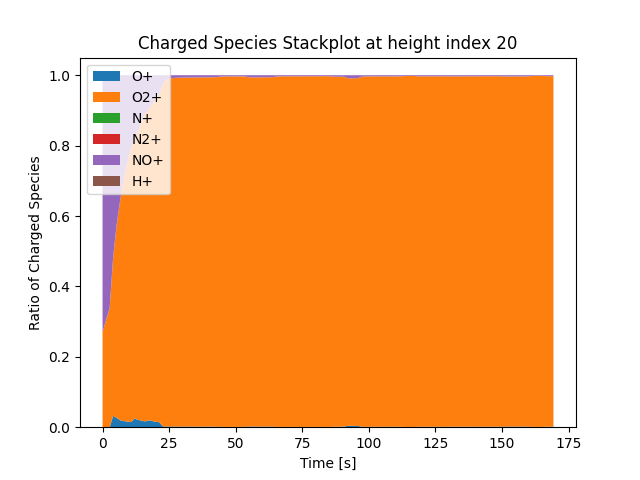

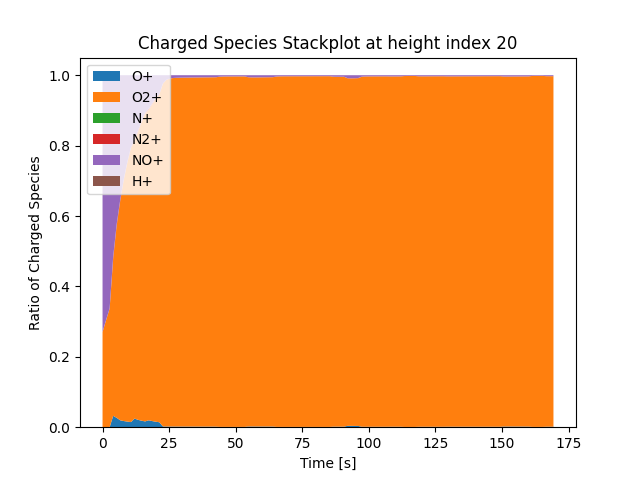

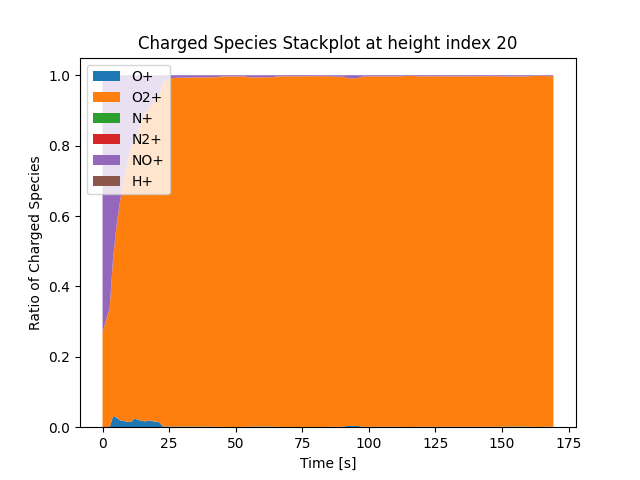

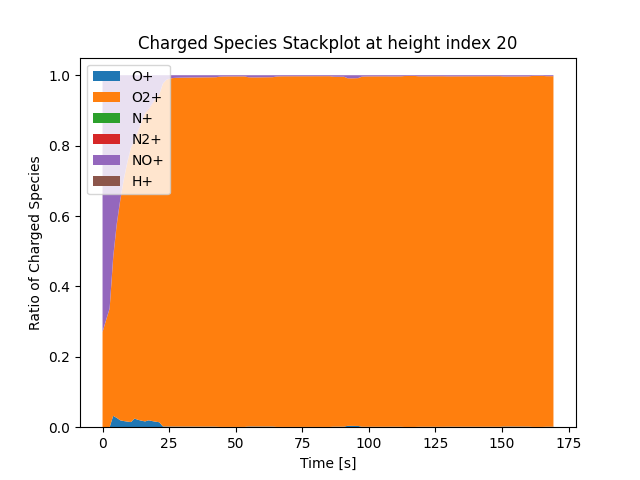

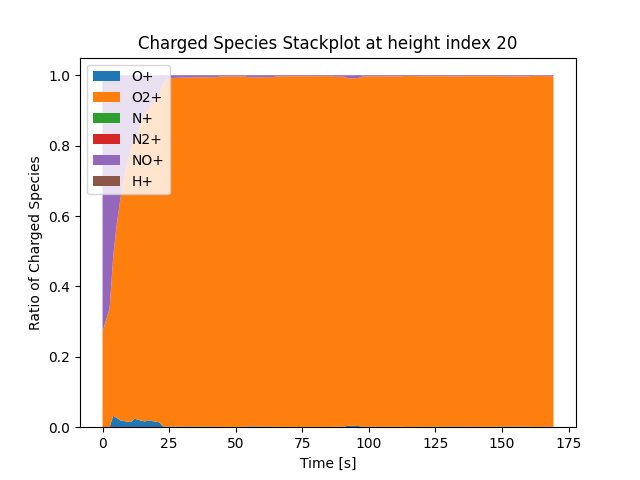

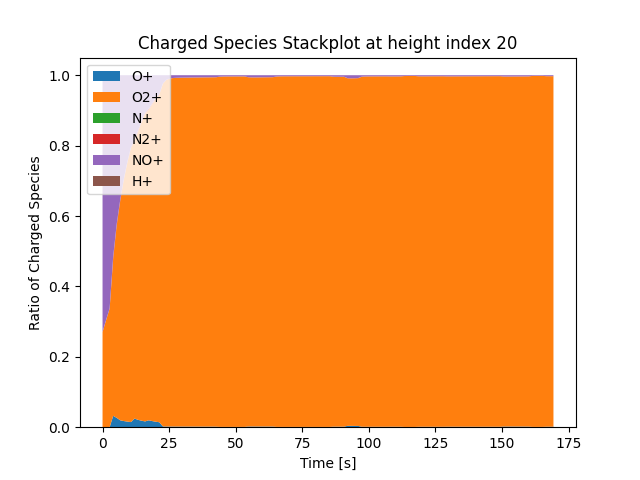

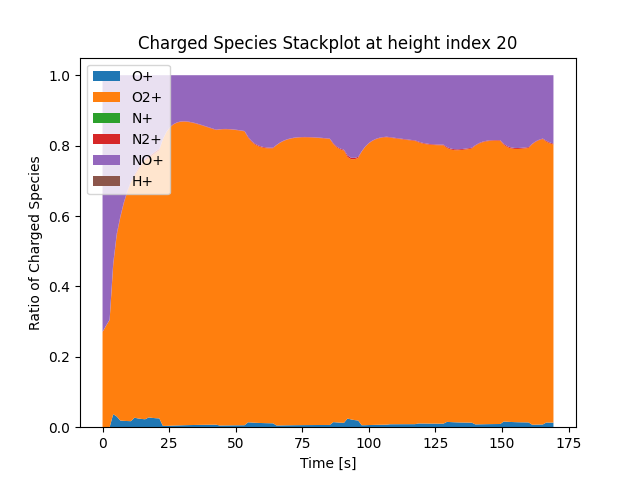

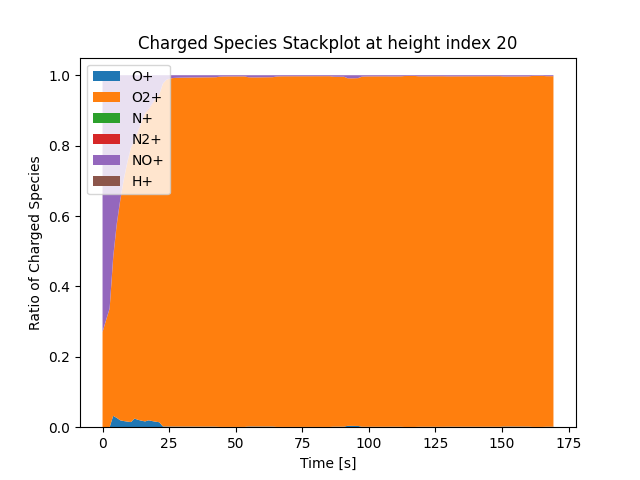

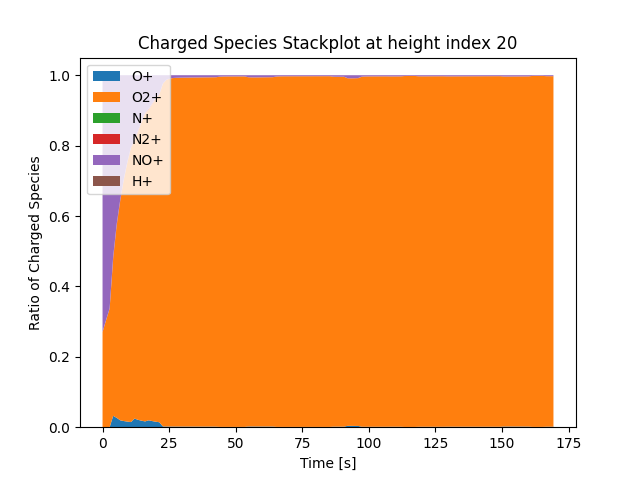

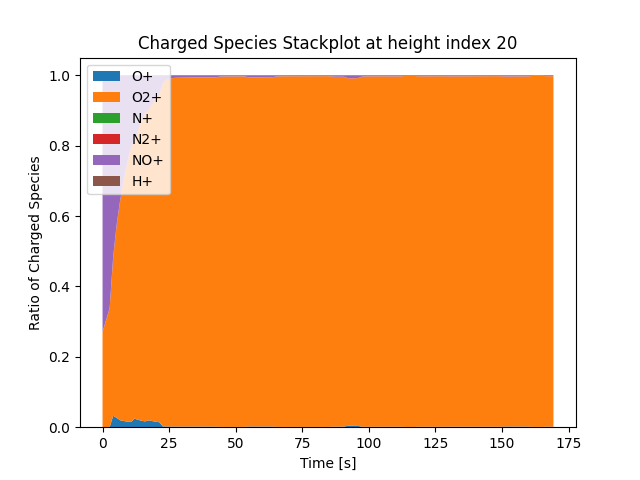

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob

direc = '/Users/ost051/Documents/PhD/ELSPEC-2022/Reactions Set Rees/'
files = glob.glob(direc + '*.pickle')

h = 20

for f in files:
    with open(f, 'rb') as pf:
        res = pickle.load(pf)
    
    elspec_iri_ICsorted = np.array([r.y for r in res])
    [e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp] = elspec_iri_ICsorted.swapaxes(0, 1)
    
    ts = res[0].t
    
    [re,rO,rOp,rO2,rO2p,rN,rNp,rN2,rN2p,rNO,rNOp,rH,rHp] = [e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp]/e
    plt.figure()
    plt.stackplot(ts, rOp[h],rO2p[h],rNp[h],rN2p[h],rNOp[h],rHp[h], \
                  labels = ['O+', 'O2+', 'N+', 'N2+', 'NO+', 'H+'])
    plt.xlabel('Time [s]')
    plt.ylabel('Ratio of Charged Species')
    plt.legend(loc = 2)
    plt.title('Charged Species Stackplot at height index ' + str(h))

In [32]:
elspec_0 = loadmat.loadmat('/Users/ost051/Documents/PhD/ELSPEC-2022/'+\
                           'Reactions Set Rees/ElSpec-iqt_IC_0.mat')["ElSpecOut"]
n_model = elspec_0["iri"]
n_model.shape
[Tn,Ti,Te,nN2,nO2,nO,nAr,nNOp,nO2p,nOp] = n_model.swapaxes(0, 1)

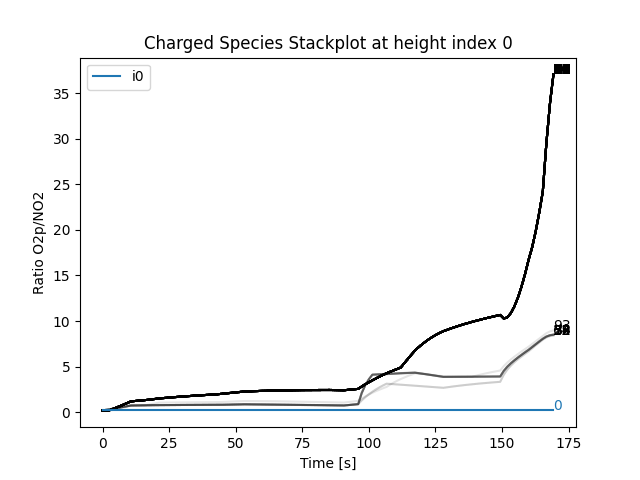

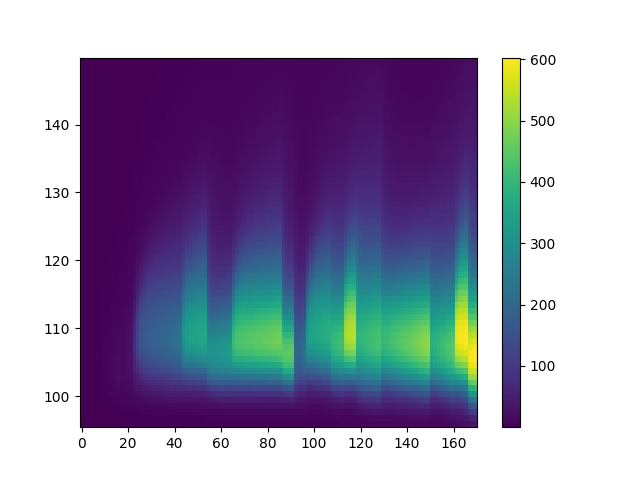

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import import_ipynb
import loadmat
#from labellines import labelLine, labelLines


elspec_0 = loadmat.loadmat('/Users/ost051/Documents/PhD/ELSPEC-2022/'+\
                    'Reactions Set Rees/ElSpec-iqt_IC_0.mat')["ElSpecOut"]
n_model = elspec_0["iri"]
[Tn,Ti,Te,nN2,nO2,nO,nAr,nNOp,nO2p,nOp] = n_model.swapaxes(0, 1)

direc = '/Users/ost051/Documents/PhD/ELSPEC-2022/Reactions Set Rees/'
files = glob.glob(direc + '*.pickle')


h = 0

fig = plt.figure()

for i, f in enumerate(files):
    with open(f, 'rb') as pf:
        res = pickle.load(pf)
    
    elspec_iri_ICsorted = np.array([r.y for r in res])
    [e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp] = elspec_iri_ICsorted.swapaxes(0, 1)
    
    ts = res[0].t
    
    [re,rO,rOp,rO2,rO2p,rN,rNp,rN2,rN2p,rNO,rNOp,rH,rHp] = [e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp]/e

    ratioO2pNOp = O2p/NOp
    
    #if i==0: plt.plot(ts, ratioO2pNOp[h], label = 'i0')
    #else: pass
    #if f==files[-1]: pass
    #else: 
    line = plt.plot(ts, ratioO2pNOp[h], alpha = 0.1, color = 'black')
    #line = plt.plot(lossRate, self.z_model/1e3, label = c.name)
    plt.text(ts[-1], ratioO2pNOp[h, -1], i, color = line[0].get_color())
    

    
line = plt.plot(ts, (nO2p/nNOp)[h], label = 'i0')   
plt.text(ts[-1], (nO2p/nNOp)[h, -1], 0, color = line[0].get_color())
plt.xlabel('Time [s]')
plt.ylabel('Ratio O2p/NO2')
plt.legend()
plt.title('Charged Species Stackplot at height index ' + str(h))
#plt.yscale('log')


fig2 = plt.figure()
f = files[3]
with open(f, 'rb') as pf:
    res = pickle.load(pf)
    
elspec_iri_ICsorted = np.array([r.y for r in res])
[e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp] = elspec_iri_ICsorted.swapaxes(0, 1)
    
ts = res[0].t

[re,rO,rOp,rO2,rO2p,rN,rNp,rN2,rN2p,rNO,rNOp,rH,rHp] = [e,O,Op,O2,O2p,N,Np,N2,N2p,NO,NOp,H,Hp]/e
ratioO2pNOp = O2p/NOp

pc = plt.pcolormesh(ts, elspec_0["h"], ratioO2pNOp)
plt.colorbar(pc)

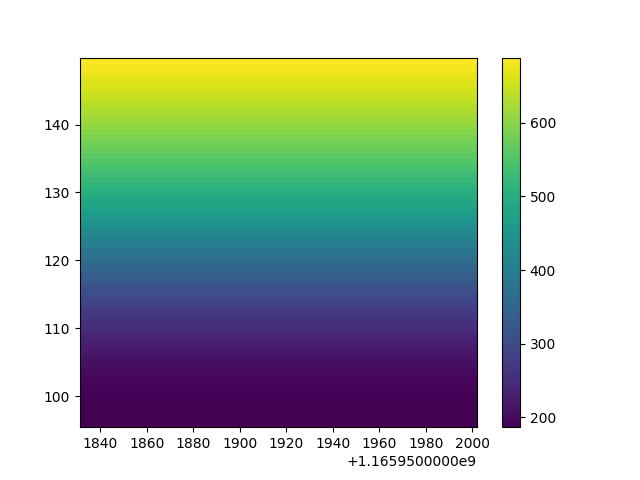

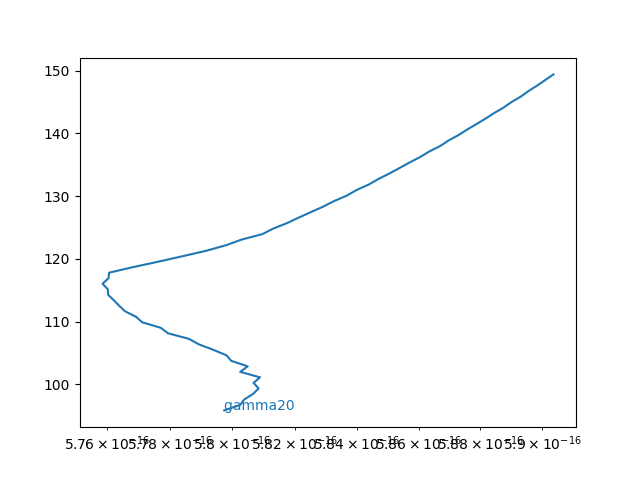

In [27]:
import import_ipynb
import loadmat
import ionChem
import matplotlib.pyplot as plt
%matplotlib widget

elspec_0 = loadmat.loadmat('/Users/ost051/Documents/PhD/ELSPEC-2022/'+\
                    'Reactions Set Rees/ElSpec-iqt_IC_0.mat')["ElSpecOut"]
n_model = elspec_0["iri"]
[Tn,Ti,Te,nN2,nO2,nO,nAr,nNOp,nO2p,nOp] = n_model.swapaxes(0, 1)
ts = elspec_0["ts"]


chemistry_config = '/Users/ost051/Documents/PhD/ELSPEC-2022/'+\
                        'Reactions Set Rees/Reaction rates.txt'
z_model = elspec_0["h"]    
model = ionChem.ionChem(chemistry_config, z_model)

plt.figure()
plt.pcolormesh(ts, z_model, (Ti + Tn)/2)
plt.colorbar()

plt.figure()
for r in model.all_reactions:
    #print(r.r_name)
    if r.r_name != 'gamma20 ': continue
    line = plt.plot(r.r_rate_t(Tn[:, 0], Ti[:, 0], Te[:, 0]), z_model)
    plt.text(r.r_rate_t(Tn[:, 0], Ti[:, 0], Te[:, 0])[0], z_model[0], r.r_name, color = line[0].get_color())
    
plt.xscale('log')

In [75]:
line[0].get_data()

(array([2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16,
        2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16, 2.e-16]),
 array([ 95.85472386,  96.73278239,  97.61084093,  98.48889947,
         99.36695801, 100.24501655, 101.12307509, 102.00113363,
        102.87919217, 103.75725071, 104.63530925, 105.51336779,
        106.39142632, 107.26948486, 108.1475434 , 109.02560194,
        109.90366048, 110.78171902, 111.65977756, 112.5378361 ,
        113.41589464, 114.29395318, 115.17201172, 116.05007026,
        116.92812879, 117.80618733, 118.68424587, 119.

In [68]:
(4000/5778)**4 *25**2

143.55219338506535

 (8/9)*6.0e-16*np.sqrt((Ti + Tn/4)/(Tn + Ti/16))
[           nan 5.78481221e-16 5.78481221e-16 5.78481221e-16
 5.78481221e-16 5.78481221e-16 5.78481221e-16 5.78481221e-16
 5.78481221e-16 5.78481221e-16 5.78481221e-16 5.78481221e-16
 5.78481221e-16 5.78481221e-16 5.78481221e-16 5.78481221e-16
 5.78481221e-16 5.78481221e-16 5.78481221e-16 5.78481221e-16]


<string>:1: RuntimeWarning: invalid value encountered in divide


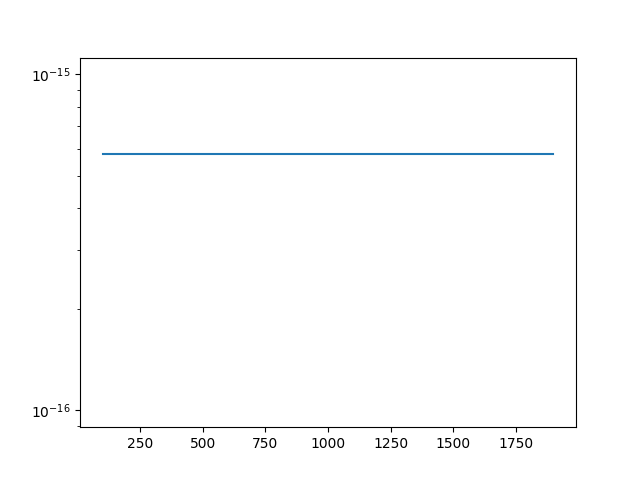

In [25]:
import numpy as np
Tr = np.arange(0, 2000, 100)
Ti = np.arange(0, 2000, 100)
Tn = np.arange(0, 2000, 100)
print(model.all_reactions[17].r_rate_string)
r = eval(model.all_reactions[17].r_rate_string)
print(r)
plt.figure()
plt.plot(Tr, r)
plt.yscale('log')